In [1]:
import rust_json_module
import glob

comment_files = glob.glob("./data/comments/*")
conversations_files = glob.glob("./data/conversations/*")
submissions_files = glob.glob("./data/submissions/*")


# List of JSON file paths
file_paths = comment_files + conversations_files + submissions_files

# Call the Rust function
topics = rust_json_module.process_files(file_paths)

# Access the results
for topic in topics:
    print(f"Topic: {topic.name}")
    print(f"Total References: {topic.total_references}")
    print("Supporting References per Date:")
    for date, count in topic.support_references_per_date.items():
        print(f"  {date}: {count}")
    print("Opposing References per Date:")
    for date, count in topic.oppose_references_per_date.items():
        print(f"  {date}: {count}")
    print("Neutral References per Date:")
    for date, count in topic.neutral_references_per_date.items():
        print(f"  {date}: {count}")

Topic: Israeli Incursions in Tulkarm (August 2023)
Total References: 165128
Supporting References per Date:
  2023-11-22: 906
  2023-09-18: 59
  2023-10-13: 932
  2023-09-08: 45
  2023-09-25: 38
  2023-11-05: 998
  2023-08-21: 18
  2023-11-29: 734
  2023-09-24: 84
  2023-09-02: 14
  2023-09-22: 41
  2023-11-15: 1220
  2023-11-13: 1032
  2023-08-05: 46
  2023-11-06: 948
  2023-10-20: 801
  2023-09-28: 72
  2023-08-01: 11
  2023-09-19: 52
  2023-10-19: 869
  2023-10-12: 790
  2023-08-29: 2
  2023-10-09: 590
  2023-09-11: 26
  2023-09-10: 42
  2023-08-15: 54
  2023-09-14: 54
  2023-08-27: 4
  2023-11-10: 949
  2023-08-06: 22
  2023-08-10: 44
  2023-11-28: 810
  2023-11-08: 1083
  2023-09-23: 32
  2023-10-24: 888
  2023-09-26: 45
  2023-09-09: 36
  2023-11-12: 955
  2023-10-18: 1321
  2023-08-25: 4
  2023-11-07: 1126
  2023-09-30: 40
  2023-09-05: 46
  2023-10-15: 790
  2023-09-20: 39
  2023-10-27: 964
  2023-10-05: 29
  2023-09-06: 38
  2023-10-31: 1162
  2023-10-22: 864
  2023-11-14: 100

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
topics[0].oppose_references_per_date

'Jabalia Refugee Camp Airstrike (October 31)'

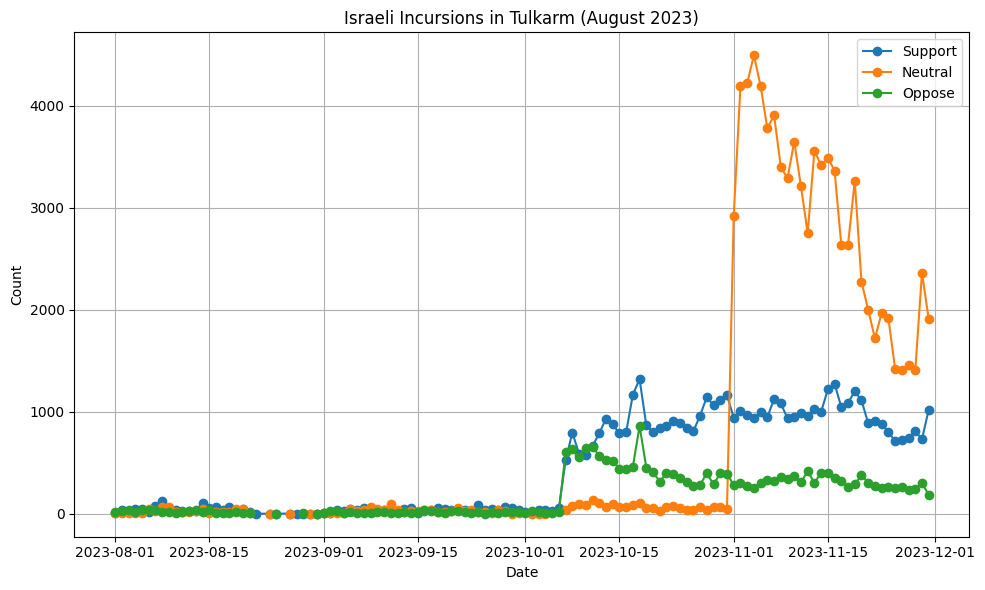

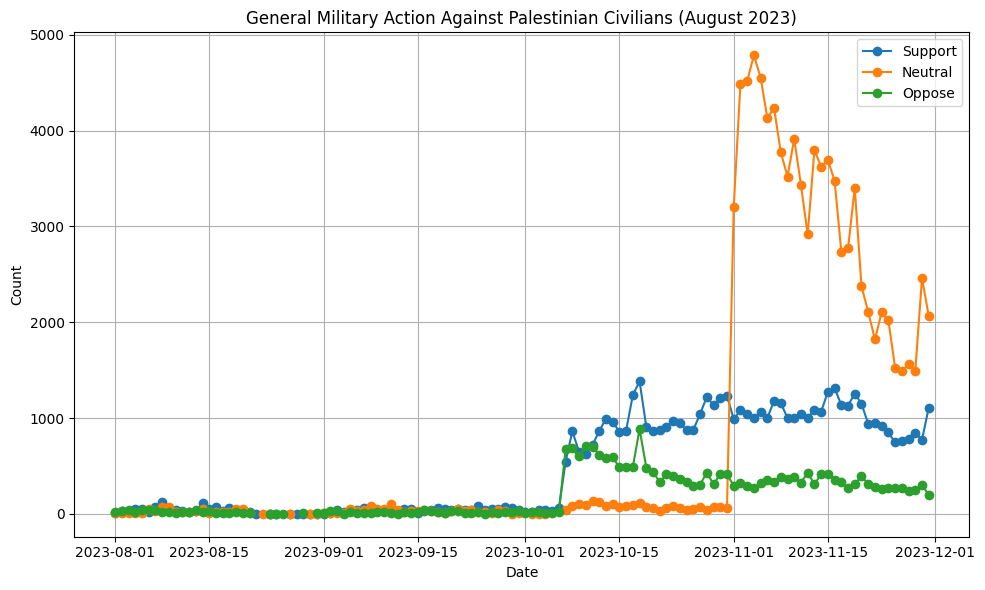

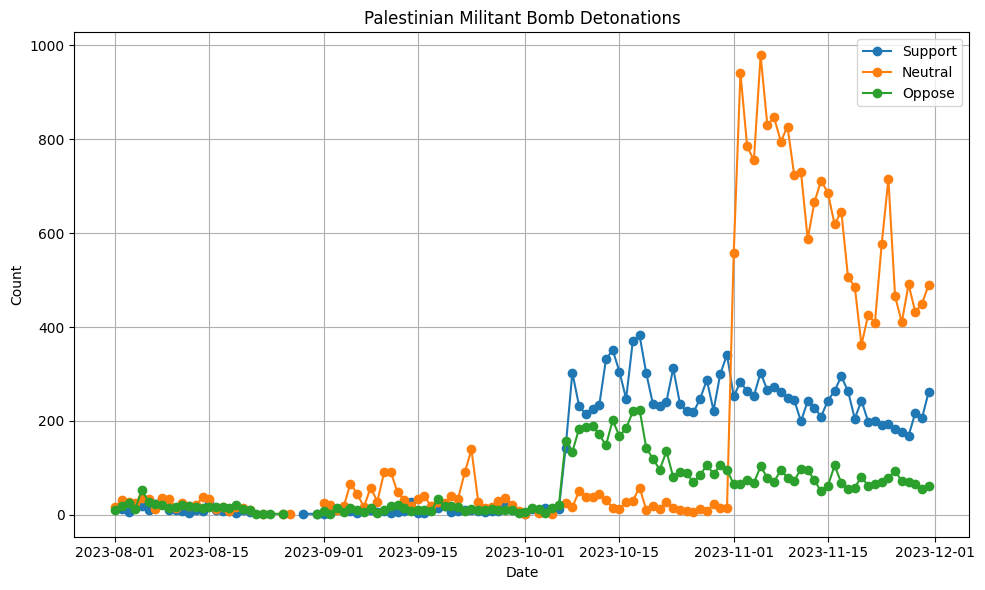

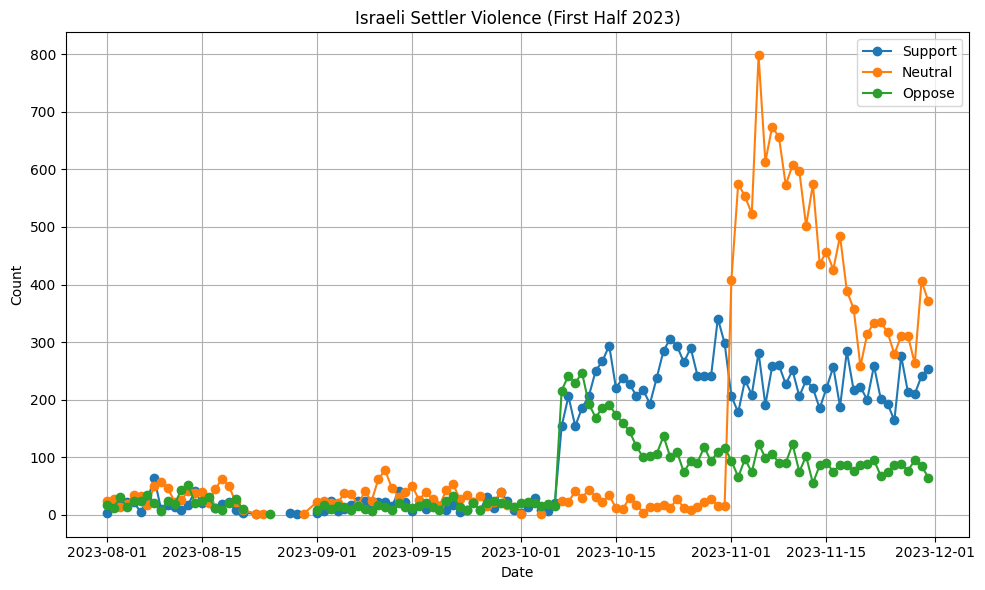

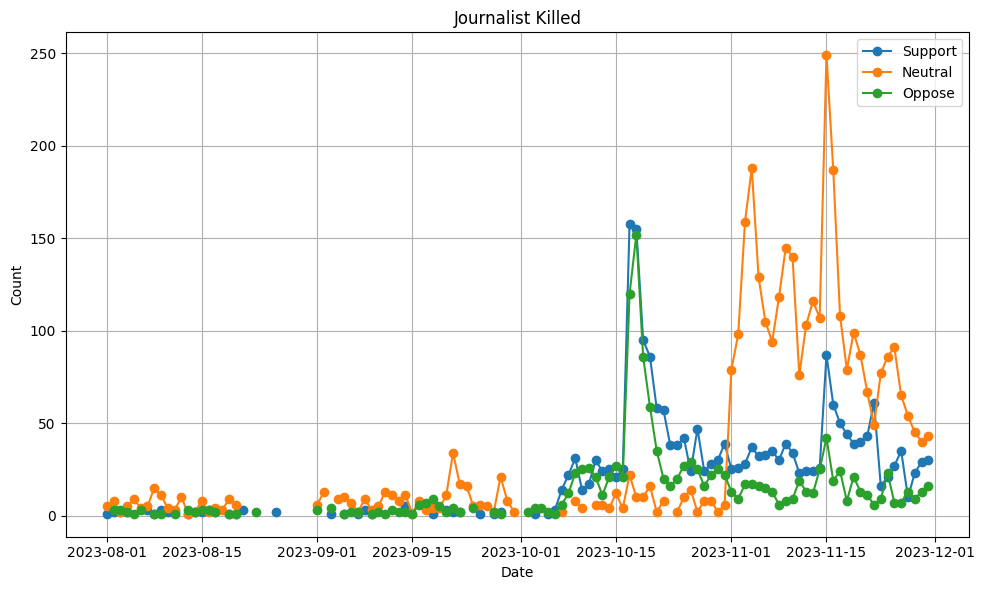

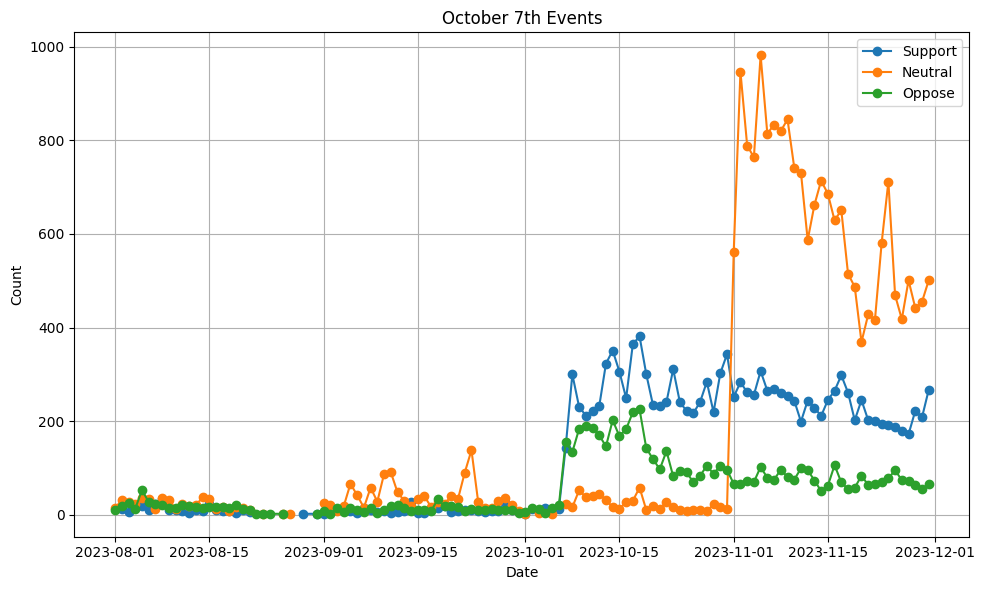

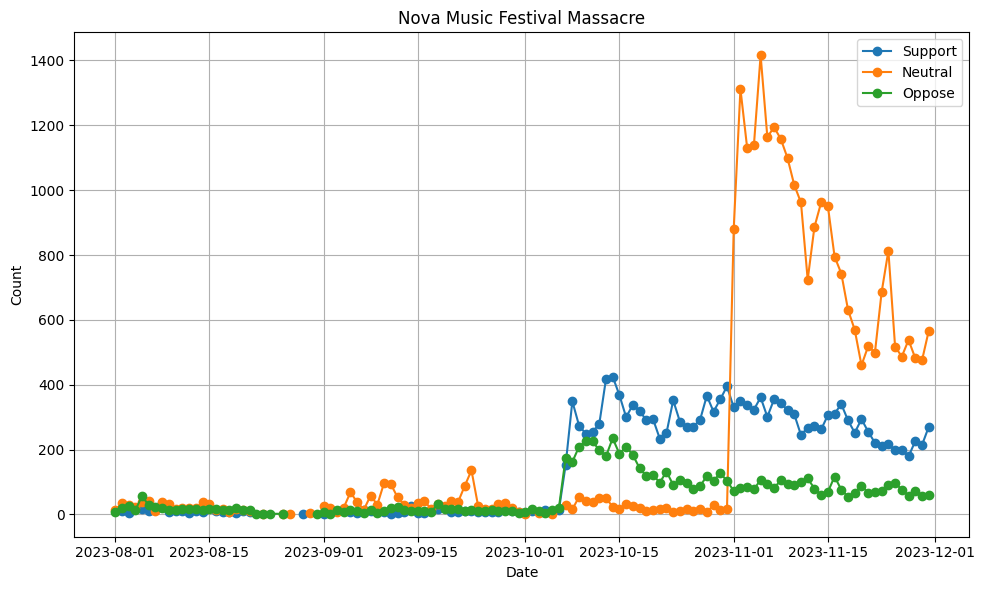

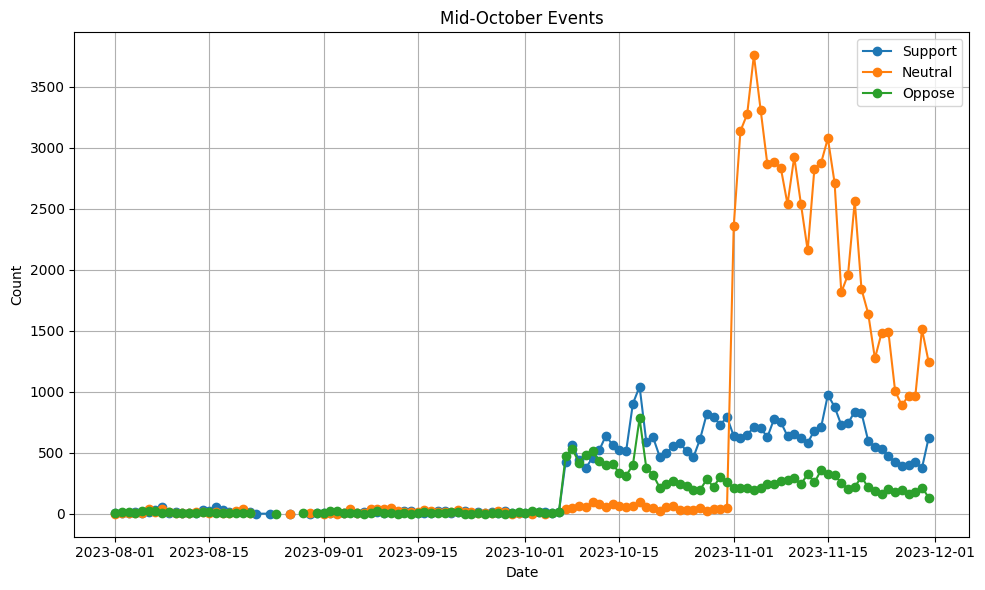

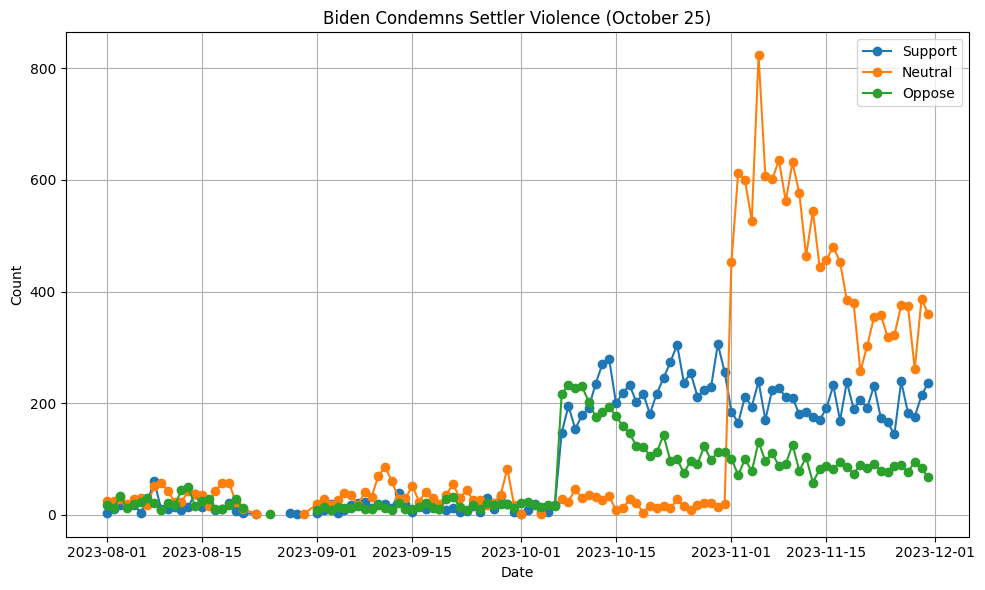

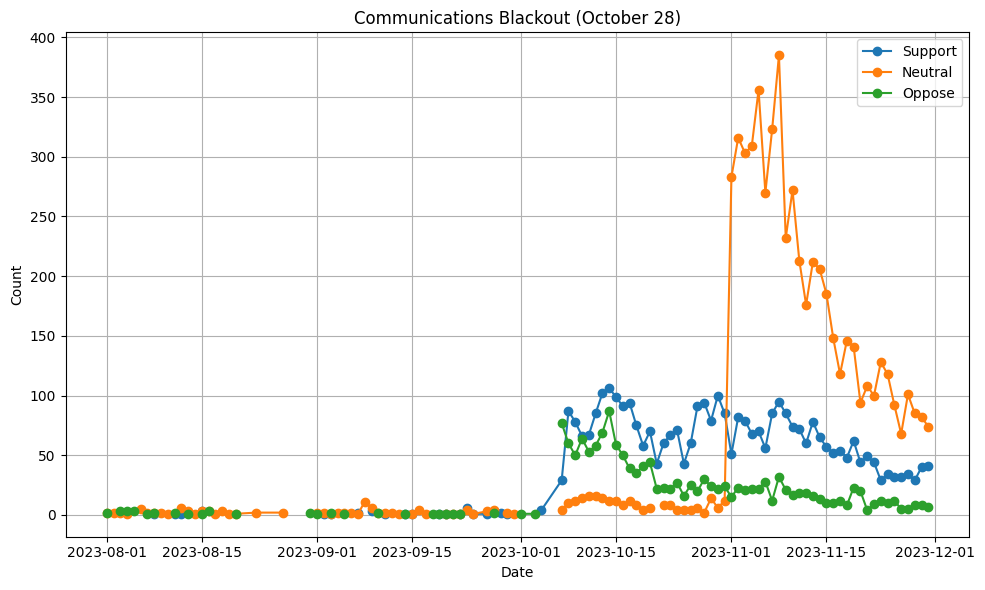

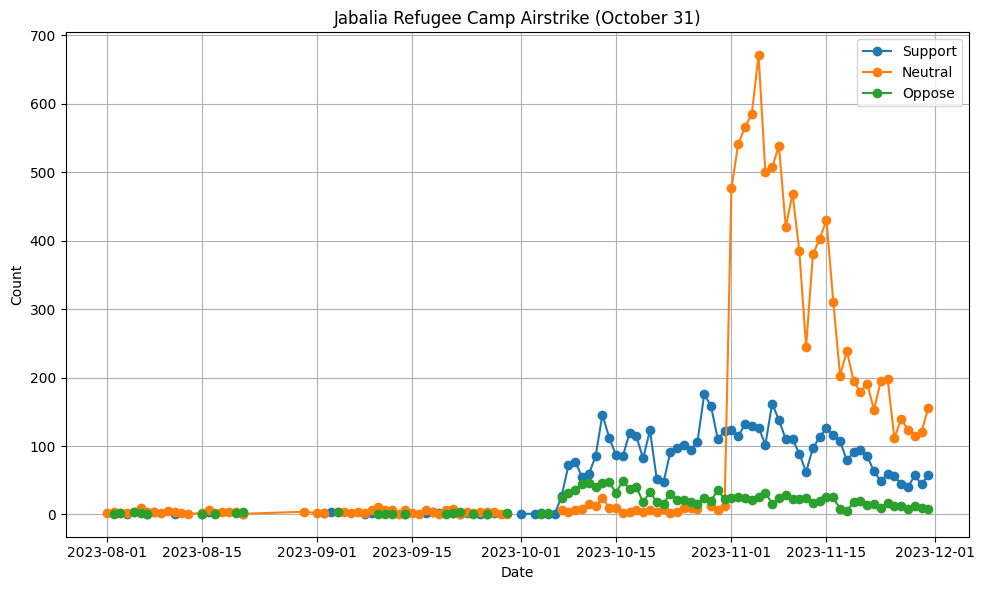

In [6]:
for topic in topics:
    support = topic.support_references_per_date
    neutral = topic.neutral_references_per_date
    oppose = topic.oppose_references_per_date

    df_support = pd.DataFrame(list(support.items()), columns=['Date', 'Support'])
    df_neutral = pd.DataFrame(list(neutral.items()), columns=['Date', 'Neutral'])
    df_oppose = pd.DataFrame(list(oppose.items()), columns=['Date', 'Oppose'])

    df = df_support.merge(df_neutral, on='Date', how='outer').merge(df_oppose, on='Date', how='outer')



    df['Date'] = pd.to_datetime(df['Date'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Support'], label='Support', marker='o')
    plt.plot(df['Date'], df['Neutral'], label='Neutral', marker='o')
    plt.plot(df['Date'], df['Oppose'], label='Oppose', marker='o')

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(topic.name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [19]:
df

,Date,Support,Neutral,Oppose
0,2023-08-01,135,1078,994
1,2023-08-02,432,1381,1421
2,2023-08-03,440,1249,1470
3,2023-08-04,396,1205,1416
4,2023-08-05,262,1094,1511
...,...,...,...,...
117,2023-11-26,3857,8799,2400
118,2023-11-27,3452,8407,2473
119,2023-11-28,4139,8021,2358
120,2023-11-29,3794,9409,2434


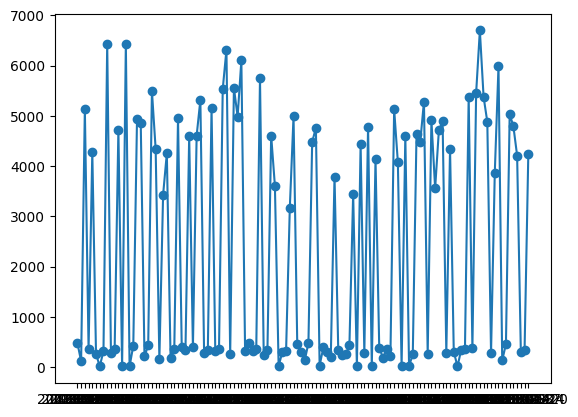

In [ ]:
plt.plot(, label="Supporting", marker='o')


In [ ]:
for topic in topics.topics:
    df = prepare_topic_data(topic)
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], df["supporting"], label="Supporting", marker='o')
    plt.plot(df["date"], df["opposing"], label="Opposing", marker='x')
    plt.plot(df["date"], df["neutral"], label="Neutral", marker='s')
    
    plt.title(f"Topic: {topic.name}")
    plt.xlabel("Date")
    plt.ylabel("Number of References")
    plt.legend()
    plt.grid(True)
    plt.show()